In [1]:
import numpy as np # linear algebra
import pandas as pd

In [8]:
import os
for dirname, _, filenames in os.walk('D:/input'):
    for filename in filenames:
        print(dirname,filename)
        os.path.join(dirname, filename)

D:/input\bcc bcc_ISIC_0024331.jpg
D:/input\bcc bcc_ISIC_0024332.jpg
D:/input\bcc bcc_ISIC_0024345.jpg
D:/input\bcc bcc_ISIC_0024360.jpg
D:/input\bcc bcc_ISIC_0024403.jpg
D:/input\bcc bcc_ISIC_0024411.jpg
D:/input\bcc bcc_ISIC_0024431.jpg
D:/input\bcc bcc_ISIC_0024432.jpg
D:/input\bcc bcc_ISIC_0024436.jpg
D:/input\bcc bcc_ISIC_0024443.jpg
D:/input\bcc bcc_ISIC_0024448.jpg
D:/input\bcc bcc_ISIC_0024452.jpg
D:/input\bcc bcc_ISIC_0024454.jpg
D:/input\bcc bcc_ISIC_0024457.jpg
D:/input\bcc bcc_ISIC_0024461.jpg
D:/input\bcc bcc_ISIC_0024472.jpg
D:/input\bcc bcc_ISIC_0024504.jpg
D:/input\bcc bcc_ISIC_0024515.jpg
D:/input\bcc bcc_ISIC_0024550.jpg
D:/input\bcc bcc_ISIC_0024564.jpg
D:/input\bcc bcc_ISIC_0024572.jpg
D:/input\bcc bcc_ISIC_0024573.jpg
D:/input\bcc bcc_ISIC_0024582.jpg
D:/input\bcc bcc_ISIC_0024590.jpg
D:/input\bcc bcc_ISIC_0024595.jpg
D:/input\bcc bcc_ISIC_0024632.jpg
D:/input\bcc bcc_ISIC_0024634.jpg
D:/input\bcc bcc_ISIC_0024665.jpg
D:/input\bcc bcc_ISIC_0024666.jpg
D:/input\bcc b

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [9]:
DATADIR = 'D:\input'
CATEGORIES = ['bcc','mel','nev']
IMG_SIZE=100

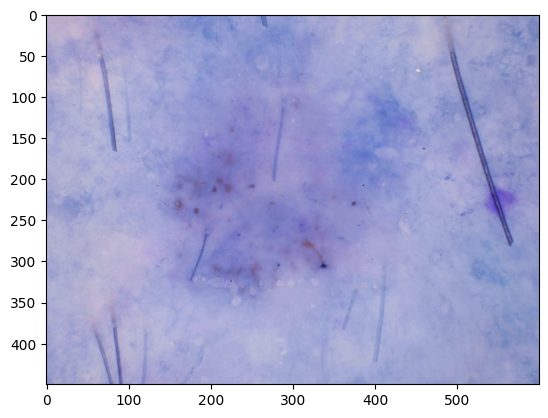

In [10]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [11]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()  

In [12]:
print(len(training_data))

322


In [13]:
lenofimage = len(training_data)

In [14]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
print(X)
X= np.array(X).reshape(lenofimage,-1)

[array([[[188, 173, 204],
        [187, 175, 205],
        [187, 173, 204],
        ...,
        [138, 144, 191],
        [137, 147, 192],
        [145, 151, 196]],

       [[190, 175, 206],
        [185, 174, 204],
        [184, 176, 206],
        ...,
        [140, 146, 193],
        [121, 133, 191],
        [139, 145, 193]],

       [[188, 175, 205],
        [184, 173, 203],
        [187, 175, 205],
        ...,
        [145, 151, 199],
        [119, 133, 191],
        [122, 135, 189]],

       ...,

       [[151, 157, 202],
        [151, 156, 203],
        [164, 167, 204],
        ...,
        [132, 145, 190],
        [108, 126, 178],
        [128, 142, 192]],

       [[146, 150, 196],
        [161, 161, 204],
        [156, 157, 201],
        ...,
        [137, 147, 195],
        [126, 143, 189],
        [119, 132, 188]],

       [[142, 148, 199],
        [156, 160, 199],
        [165, 167, 202],
        ...,
        [141, 148, 195],
        [132, 144, 192],
        [117, 129, 186]

In [15]:
X.shape

(322, 30000)

In [16]:
X = X/255.0

In [17]:
X[1]

array([0.50588235, 0.5254902 , 0.70196078, ..., 0.60392157, 0.57647059,
       0.74509804])

In [18]:
y=np.array(y)

In [19]:
y.shape

(322,)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [21]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [22]:
y2 = svc.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.7407407407407407
